In [2]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.1


v3.0


v2.1


In [23]:
#create parameters
params = []
ϕas = [0.5, 0.3]
ϕps = [0.1, 0.6]
DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 20.0, 1.0, 100, 0.01, 2.0, 0.5, 0.3, 0.6, 1e-5, 0.1);
#T, save_interval, param_name = (19.8, 0.01, "fig_1")
T, save_interval, param_name = (20.0, 0.0001, "fig_4")
map(ϕas, ϕps) do ϕa, ϕp
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(params,param)
end
param = params[2];

In [41]:
@unpack Nx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param)

t_start = length([t for t in ts if t<8])
t_end   = length(ts)
ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
# ft      = ft[t_start:1:t_end, : ,: ]
# ts      = ts[t_start:1:end]
pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
centre  = Nx ÷ 2 + 1 
ft  = circshift(ft, (0,-pk + centre, 0));

df = t_dff(ts , ft; N=Nx)

course_x = 1:100:length(ts)
bw = 0.25
smooth_df   = KernelDensitySJ.smooth(ts[course_x],df[course_x],bw,ts[course_x])
pks, vals   = findmaxima(smooth_df)
pks, proms  = peakproms(pks, smooth_df)
# ts[pks[3]], ts[pks[5]]
peak_1 = 100*pks[4]
peak_2 = 100*pks[6]
ft      = ft[peak_1:1:peak_2, : ,: ];
ts      = ts[peak_1:1:peak_2] .- ts[peak_1];


fast load


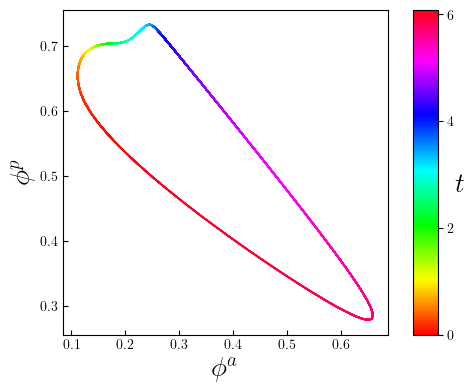

In [42]:
# create fig 
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(5,5))
#
ax = fig.add_axes([0.15,0.1, 0.65, 0.65])
        
step = 4*(Nx ÷ 4)
# Create a colormap (you can choose any colormap you like)
colormap = get_cmap("hsv")

# Normalize color_function to the range [0, 1]
#normalized_color_function = (ts .- ts[1]) / (ts[end] - ts[1])

# Create a scatter plot with a color gradient
norm1 = matplotlib.colors.Normalize(vmin= ts[1], vmax= ts[end]) 
im1 = ax.scatter(ft[:,step,1]+ft[:,step,2], ft[:,step,3], c=ts, cmap=colormap, marker="o", s = 0.05, norm = norm1)

# ax parameters
    ax.set_xlabel(L"\phi^a",fontsize=20)
    ax.set_ylabel(L"\phi^p", fontsize=20)
    # axlim = [0, 1, 0, 0.275]
    # ax.axis(axlim)
    # ax.xaxis.set_ticks(0.:0.2:1.0)
    # ax.yaxis.set_ticks(0.:0.1:0.3)
    ax.tick_params(labelbottom = true, direction = "in")
# add colourbar
    cbar_ax = fig.add_axes([0.85, 0.1, 0.05 , 0.65])
    cbar = fig.colorbar(im1, cax=cbar_ax)
    cbar.set_ticks(0.0:2:ts[end])
    cbar_ax.set_ylabel(L"t",fontsize=20, rotation = 0)

display(fig)
fig_name = "periodic_plot"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/v0=$(v0).pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

In [61]:
#plot spinodal
ϕas = collect(0.001:0.001:0.999)
    ϕa_sols, low_ϕps, high_ϕps = return_complex_boundary_outer(ϕas; Pe = Pe)
    n = length([x for x in ϕa_sols if x < 0.42])
    N = length(ϕa_sols)
    ax.plot(ϕa_sols[1:n], low_ϕps[1:n], color = "green", label = "Complex")
    ax.plot(ϕa_sols[1:n], high_ϕps[1:n], color = "green", label = "_Complex")
    ax.plot(ϕa_sols[(n+1):1:N], low_ϕps[(n+1):1:N], color = "green", label = "_Complex")
    ax.plot(ϕa_sols[(n+1):1:N], high_ϕps[(n+1):1:N], color = "green", label = "_Complex")


    ϕa_sols, low_ϕps1, high_ϕps1, low_ϕps2, high_ϕps2 = return_complex_boundary_inner(ϕas; Pe = Pe)
    ax.plot(ϕa_sols, low_ϕps1, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, high_ϕps1, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, low_ϕps2, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, high_ϕps2, color = "green", label = "_Complex")
    
    ϕa_low, ϕa_high, low_ϕps2, high_ϕps2 = return_stable_boundary(ϕas; Pe = Pe)
    ax.plot(ϕa_low, low_ϕps2, color = "blue", label = "Spinodal")
    ax.plot(ϕa_high, high_ϕps2, color = "blue", label = "_Spindoal")

    ϕa_low, ϕa_mid, ϕa_high, low_ϕps, mid_ϕps, high_ϕps = return_stable_boundary_extra(ϕas; Pe = Pe)
    ax.plot(ϕa_low, low_ϕps, color = "blue", label = "_Spinodal")
    ax.plot(ϕa_high, high_ϕps, color = "blue", label = "_Spindoal")
    ax.plot(ϕa_mid, mid_ϕps, color = "blue", label = "_Spindoal")

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7a16f495e0>

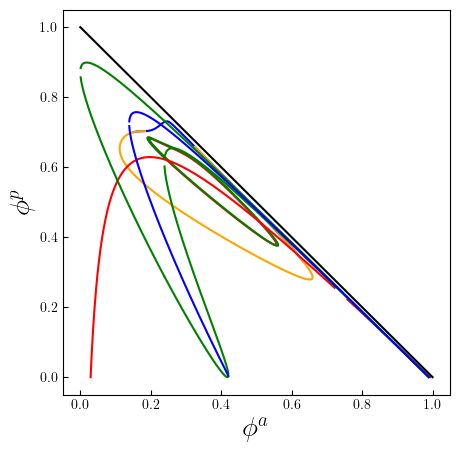

In [63]:
ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")
display(fig)

In [74]:
using PyPlot

# Create data for the x-axis and a corresponding function for colors
x = range(0, stop=10, length=1000)
color_function = sin.(x)

# Create a colormap (you can choose any colormap you like)
colormap = get_cmap("viridis")

# Create a figure
fig, ax = subplots()

# Normalize color_function to the range [0, 1]
normalized_color_function = (color_function .- minimum(color_function)) / (maximum(color_function) - minimum(color_function))

# Create a scatter plot with a color gradient
scatter(x, color_function, c=normalized_color_function, cmap=colormap, marker="o")

# Create a colorbar to show the mapping of colors to values
cbar = colorbar()

# Set the axis limits
ax.set_xlim(x[1], x[end])
ax.set_ylim(minimum(color_function), maximum(color_function))

# Show the plot
show()


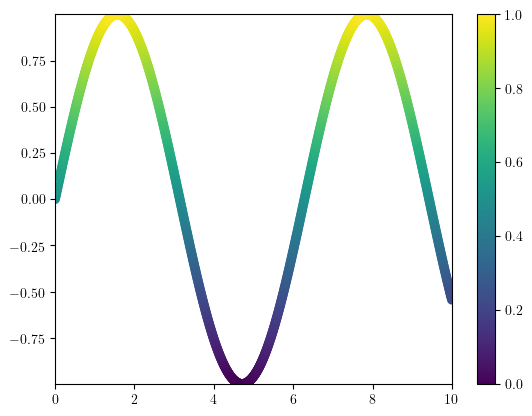

In [75]:
display(fig)